## Author: Saloni Gupta

Date: 30/10/2020

### The Power of Plots - Pymaceuticals Inc.

In [1]:
# Importing Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Studying data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the Mouse data and the Study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataset
pyma_df = pd.merge(mouse_metadata,study_results,on = "Mouse ID",how = "outer")

# Displaying the data table for preview (1893 records)
pyma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of unique mice.
mice = pyma_df["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pyma_df.loc[pyma_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID( dropping g989 Mouse ID).
clean_df = pyma_df[pyma_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.(now unique mice count is one less than before)
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# First grouping data by Drug Regimen
summaryData = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])
 
# Assembling the resulting series into a single summary dataframe.

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Deviation": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generating a summary stats table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, producing the same summary statistics in a single line

summary_stats = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([('Mean','mean'),('Median','median'),('Variance','var'),('Standard Deviation','std'),('SEM','sem')])
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

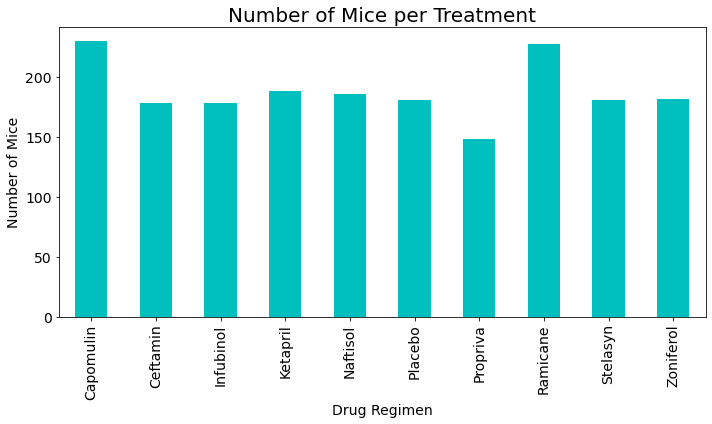

In [9]:
# Generating a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Calculate the amount of unique mice for each drug regimen
count_mice_per_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
count_mice_per_drug

#Plot the bar graph
count_mice_per_drug.plot(kind="bar",figsize=(10,6), color='c',fontsize = 14, alpha = 1)

# Set labels for axes
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

#Save the output and display resulting plot
plt.savefig("Images/pandas_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

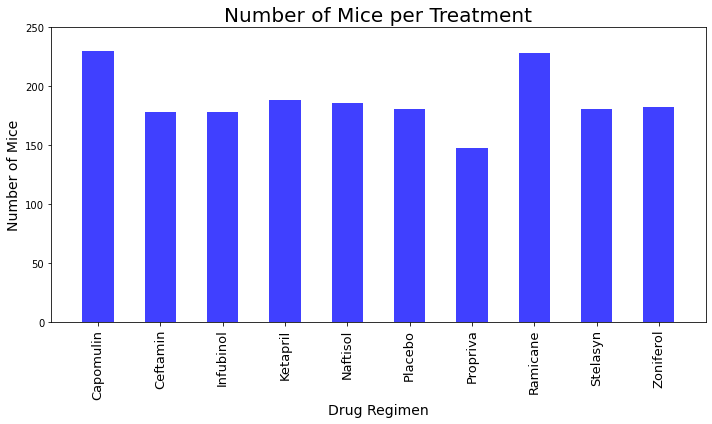

In [10]:
# Generating a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set the x_axis to the length of the 'count_mice_per_drug' series
x_axis = np.arange(len(count_mice_per_drug))
tick_locations = [value for value in x_axis]
mice_list = count_mice_per_drug.tolist()
mice_list


#Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x_axis, mice_list,width=0.5, color='b', alpha=0.75, align = 'center')

# Label the tick marks according to the index values in the 'count_mice_per_drug' series
# Rotate tick marks vertically or by 90 degrees for visibility
plt.xticks(tick_locations, list(count_mice_per_drug.index), rotation="vertical",fontsize = 13)
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, max(mice_list) +20)

# Set labels for axes
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.tight_layout()

#Save the output and display resulting plot
plt.savefig("Images/pyplot_mice_per_treat.png", bbox_inches = "tight")
plt.show()


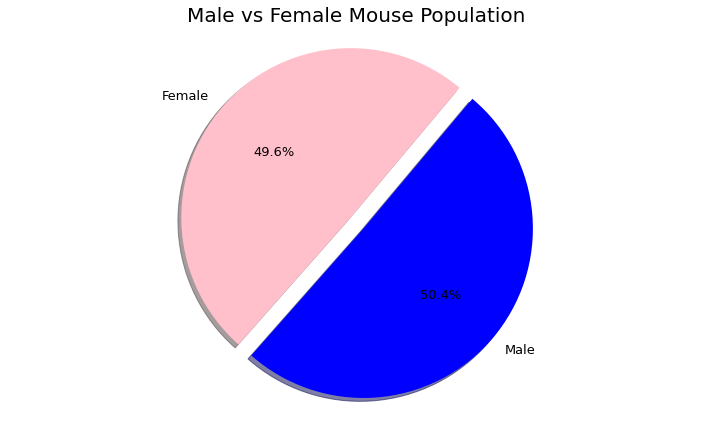

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Identify distribution of data by sex
miceCount = clean_df.groupby(["Mouse ID","Sex"]).size()
Total_mice_by_gender = miceCount.groupby(["Sex"]).count()
Total_mice_by_gender
colors = ['pink', 'blue']

#Determine which section of the circle to detach
explode = (0.1, 0)
plt.figure()

# Plot a pie chart filled with corresponding percentages and displayed at an angle of 50 degrees
Total_mice_by_gender.plot.pie(y= 'Total_mice_by_gender', autopct='%1.1f%%', explode= explode,textprops={'fontsize': 13},
                        colors = colors, shadow = True, figsize=(10,6), startangle = 50)

#Set equal axis and labels
plt.axis("equal")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('')
plt.tight_layout()

# Save and Display the resulting plot
plt.savefig("Images/pandas_gender_piegraph.png", bbox_inches = "tight")
plt.show()



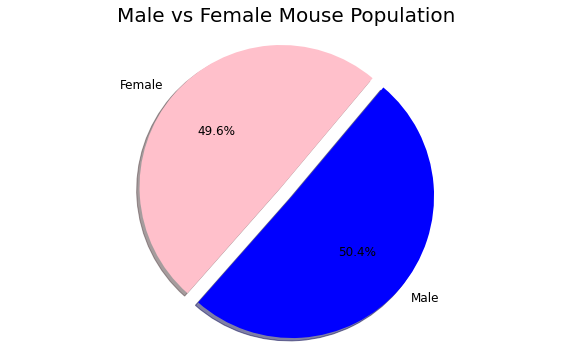

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determine which section of the circle to detach
explode = (0.1, 0)

# Plot a pie chart filled with corresponding percentages and displayed at an angle of 50 degrees
plt.figure(figsize=(10,6))
plt.pie(Total_mice_by_gender,autopct='%1.1f%%', explode= explode, labels = Total_mice_by_gender.index.values,
                                textprops={'fontsize': 12},colors = colors, shadow = True, startangle = 50)

#Set equal axis and labels
plt.axis("equal")
plt.title('Male vs Female Mouse Population',fontsize = 20)

# Save and Display the resulting plot
plt.savefig("Images/pyplot_gender_piegraph.png", bbox_inches = "tight")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Started by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
last_timepoint

# Merging this group with the original dataframe to get the tumor volume at the last timepoint
mergedVol = last_timepoint.merge(pyma_df, on =("Mouse ID","Timepoint"), how = "left")
mergedVol.head()                               

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Putting the treatments into a list for for loop (and later for plot labels)
four_drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Creating empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate each drug's Tumor Volume from our list 'four_drug_list' in the mergedVol Dataframe
for drug in four_drug_list:
    volume_data = mergedVol.loc[mergedVol["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # Appendind data in list 'tumor_vol', so that it consists of all final volume values for each regimen
    tumor_vol.append(volume_data)
    
    # Calculating and printing the IQR and quantitatively determine if there are any potential outliers.
    quartiles = volume_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = round(upperq-lowerq,2)
    
    print(f"The interquartile range of occupancy for {drug} is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers for {drug}.")
    
    # Quantitatively check for outliers
    outliers_count = (volume_data.loc[(volume_data > upper_bound) |(volume_data < lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

The interquartile range of occupancy for Capomulin is: 7.78
Values below 20.71 and above 51.83 could be outliers for Capomulin.
Number of Capomulin outliers: 0
The interquartile range of occupancy for Ramicane is: 9.1
Values below 17.91 and above 54.31 could be outliers for Ramicane.
Number of Ramicane outliers: 0
The interquartile range of occupancy for Infubinol is: 11.48
Values below 36.83 and above 82.75 could be outliers for Infubinol.
Number of Infubinol outliers: 1
The interquartile range of occupancy for Ceftamin is: 15.58
Values below 25.35 and above 87.67 could be outliers for Ceftamin.
Number of Ceftamin outliers: 0


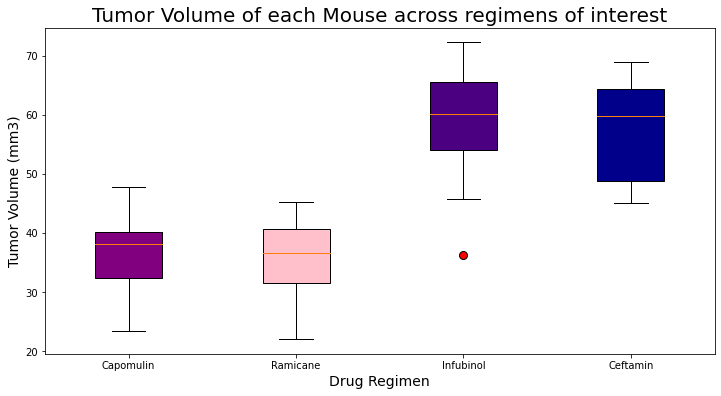

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12, 6))

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
box = ax1.boxplot(tumor_vol, labels=four_drug_list, widths = 0.4, patch_artist=True, vert=True, flierprops=flierprops)

# fill with colors
colors = ['purple','pink','indigo','darkblue']
for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

# Add title and labels to boxplot
ax1.set_title('Tumor Volume of each Mouse across regimens of interest',fontsize =20)
ax1.set_ylabel('Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)

#Save and display the resulting boxplot
plt.savefig("Images/drug_vs_volume_box_plot.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

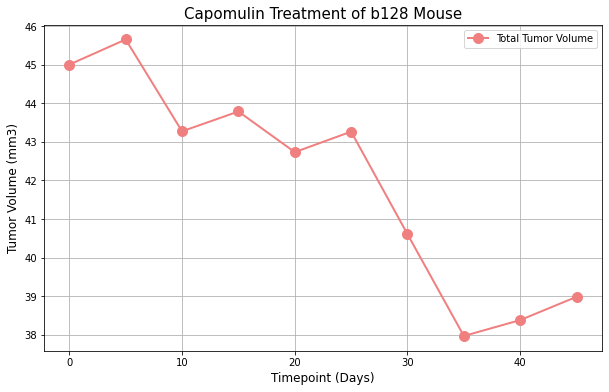

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of any random mouse(say b128) treated with Capomulin
tumor_data = clean_df[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "b128")]
x_axis = tumor_data["Timepoint"]
y_axis = tumor_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 6))

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(x_axis, y_axis,linewidth=2, markersize=10,marker="o",color="lightcoral", label="Total Tumor Volume")
plt.legend(loc="best")

# Add labels and title to plot
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)
plt.title('Capomulin Treatment of b128 Mouse',fontsize =15)
plt.grid(True)

#Save and display plot
plt.savefig("Images/capomulin_line_graph.png", bbox_inches = "tight")
plt.show()


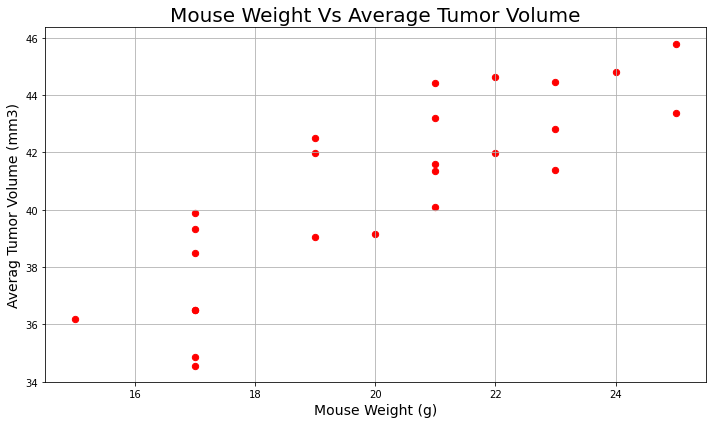

In [17]:
# Consider cases that only use the Capomulin regimen
Capomulin_df = clean_df[(clean_df["Drug Regimen"] == "Capomulin")]

# Finding average tumor volume for each mouse
avg_capm_vol =Capomulin_df.groupby(['Mouse ID','Weight (g)'])["Tumor Volume (mm3)"].mean().sort_values().reset_index()
avg_capm_vol

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capm_vol.plot.scatter(['Weight (g)'],['Tumor Volume (mm3)'],s=40,figsize=(10,6), c= 'red' )

# Adding labels and title to plot
plt.title('Mouse Weight Vs Average Tumor Volume',fontsize =20)
plt.xlabel('Mouse Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.tight_layout()
plt.grid(True)

#Display the plot
plt.savefig("Images/capomulin_scatterplot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate and print the correlation coefficient between mouse weight and average tumor volume
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


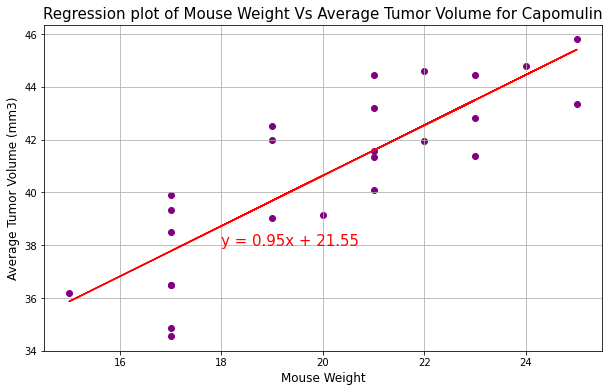

In [19]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Calculate linear regression
(slope, intercept, rvalue, pvalue, std) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values,color = 'purple')
plt.plot(x_values,regress_values,"r-")

# Add labels and title to plot
plt.title("Regression plot of Mouse Weight Vs Average Tumor Volume for Capomulin", fontsize =15)
plt.xlabel("Mouse Weight", fontsize = 12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 12)
plt.grid(True)

# Annotate linear regression
ax1.annotate(line_eq,(18,38),fontsize=15,color="red")

#Display and show the plot
plt.savefig("Images/capomulin_regression_plot.png", bbox_inches = "tight")
plt.show()

### Observations and Insights 
1. Total unique mice in the experiment were 249 and by removing duplicates the total number of mice left were 248. The total count of mice by gender showed that there were 123 female and 125 male mice which was fairly close.
2. The bar graph showed the Drug Regimen Capomulin has the maximum mice number(230), and Zoniferol has the smaller mice number (182).
3. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.
4. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
5. The regression analysis helped us to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared(of 0.84)value is 0.70, which means 70% the model fits the data.Concluding, the model explains high variability of the response data around its mean.